<a href="https://colab.research.google.com/github/lllor/Aps1052GroupProject/blob/main/aps1052_Final_Project_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

## Loading Data from Yahoo Finance

In [ ]:
%%capture
!pip install yfinance
!pip install fix_yahoo_finance

In [ ]:
import yfinance as yf

In [195]:
# Data Loading
# data = yf.download("AMZN AAPL GOOG IBM MSFT", start='2017-11-02', end='2018-11-02', interval='1d')
# data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                \
                 AAPL       AMZN       GOOG         IBM        MSFT   
Date                                                                  
2017-11-02  39.886845  54.710999  51.278999  115.579865   79.145210   
2017-11-03  40.928436  55.580002  51.624001  114.245811   79.229958   
2017-11-06  41.343662  56.033001  51.294998  113.688057   79.540703   
2017-11-07  41.476532  56.158501  51.666500  114.072449   79.352356   
2017-11-08  41.815819  56.644001  51.992500  114.238243   79.625443   
...               ...        ...        ...         ...         ...   
2018-10-26  52.096676  82.140503  53.573502   98.042374  102.533455   
2018-10-29  51.118824  76.944000  51.004002   93.996239   99.552162   
2018-10-30  51.374126  76.521004  51.810501   90.665047   99.437141   
2018-10-31  52.713268  79.900497  53.838501   90.688629  102.389656   
2018-11-01  53.522545  83.276497  53.500000   91.788536  101.536484   

                Close                                                ...  \
                 AAPL       AMZN       GOOG         IBM        MSFT  ...   
Date                                                                 ...   
2017-11-02  42.027500  54.710999  51.278999  146.606125   84.050003  ...   
2017-11-03  43.125000  55.580002  51.624001  144.913956   84.139999  ...   
2017-11-06  43.562500  56.033001  51.294998  144.206497   84.470001  ...   
2017-11-07  43.702499  56.158501  51.666500  144.694077   84.269997  ...   
2017-11-08  44.060001  56.644001  51.992500  144.904404   84.559998  ...   
...               ...        ...        ...         ...         ...  ...   
2018-10-26  54.075001  82.140503  53.573502  119.302101  106.959999  ...   
2018-10-29  53.060001  76.944000  51.004002  114.378586  103.849998  ...   
2018-10-30  53.325001  76.521004  51.810501  110.325050  103.730003  ...   
2018-10-31  54.715000  79.900497  53.838501  110.353729  106.809998  ...   
2018-11-01  55.555000  83.276497  53.500000  111.692162  105.919998  ...   

                 Open                                                \
                 AAPL       AMZN       GOOG         IBM        MSFT   
Date                                                                  
2017-11-02  41.650002  54.890499  51.088001  147.399612   83.349998   
2017-11-03  43.500000  54.557499  51.105499  146.673035   84.080002   
2017-11-06  43.092499  55.457500  51.449501  145.095596   84.199997   
2017-11-07  43.477501  56.237000  51.363499  144.713196   84.769997   
2017-11-08  43.665001  56.140999  51.526001  144.933075   84.139999   
...               ...        ...        ...         ...         ...   
2018-10-26  53.974998  82.479500  51.851501  119.703636  105.690002   
2018-10-29  54.797501  83.000000  54.123501  114.091782  108.110001   
2018-10-30  52.787498  74.307999  50.423000  115.181641  103.660004   
2018-10-31  54.220001  78.499496  52.990501  111.367111  105.440002   
2018-11-01  54.762501  81.176498  53.790001  110.420647  107.050003   

               Volume                                           
                 AAPL       AMZN      GOOG       IBM      MSFT  
Date                                                            
2017-11-02  165573600   73698000  20980000   3553890  23992900  
2017-11-03  237594400   75030000  21528000   4635663  17633500  
2017-11-06  140105200   67622000  22504000   4705326  19860900  
2017-11-07   97446000   53780000  22246000   3871351  17939700  
2017-11-08   97638000   51630000  21774000   4847582  18034200  
...               ...        ...       ...       ...       ...  
2018-10-26  189033600  299276000  83752000   9170282  55523100  
2018-10-29  183742000  277322000  77614000  21391118  55162000  
2018-10-30  146640000  249202000  64254000  22445696  65350900  
2018-10-31  153435600  187804000  50596000  22640670  51062400  
2018-11-01  233292800  162710000  29640000  14253528  33384200  

[252 rows x 30 columns]

In [196]:
return_period = 5

In [209]:
GOOG = yf.download("GOOG", start='2017-11-02', end='2018-11-02', interval='1d')
GOOG = GOOG.reset_index()

[*********************100%***********************]  1 of 1 completed


In [210]:
AAPL = yf.download("AAPL", start='2017-11-02', end='2018-11-02', interval='1d')
AAPL = AAPL.reset_index()

[*********************100%***********************]  1 of 1 completed


In [211]:
IBM = yf.download("IBM", start='2017-11-02', end='2018-11-02', interval='1d')
IBM = IBM.reset_index()

[*********************100%***********************]  1 of 1 completed


In [212]:
MSFT = yf.download("MSFT", start='2017-11-02', end='2018-11-02', interval='1d')
MSFT = MSFT.reset_index()

[*********************100%***********************]  1 of 1 completed


In [250]:
AMAZON = yf.download("AMZN", start='2017-11-02', end='2018-11-02', interval='1d')
AMAZON = AMAZON.reset_index()
# AMAZON = AMAZON.diff(return_period).shift(-return_period)
AMAZON

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-02,54.890499,55.097000,54.343498,54.710999,54.710999,73698000
1,2017-11-03,54.557499,55.633999,54.425999,55.580002,55.580002,75030000
2,2017-11-06,55.457500,56.270500,55.438499,56.033001,56.033001,67622000
3,2017-11-07,56.237000,56.529999,55.875000,56.158501,56.158501,53780000
4,2017-11-08,56.140999,56.777000,55.955502,56.644001,56.644001,51630000
...,...,...,...,...,...,...,...
247,2018-10-26,82.479500,84.922997,80.150002,82.140503,82.140503,299276000
248,2018-10-29,83.000000,83.287003,74.750000,76.944000,76.944000,277322000
249,2018-10-30,74.307999,77.049500,73.818001,76.521004,76.521004,249202000
250,2018-10-31,78.499496,81.195503,78.254501,79.900497,79.900497,187804000


In [223]:
ccy_tickers = ['DTWEXBGS', 'DEXUSEU', 'DEXJPUS', 'DEXCHUS', 'DEXCAUS']
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_tickers = ['VIXCLS', 'GVZCLS', 'VXVCLS', 'OVXCLS', 'VXNCLS']
idx_data = web.DataReader(idx_tickers, 'fred')

In [224]:
ccy_data = ccy_data[ccy_data.index > '2017-11-02']
ccy_data = ccy_data[ccy_data.index < '2018-11-02']
idx_data = idx_data[idx_data.index > '2017-11-02']
idx_data = idx_data[idx_data.index < '2018-11-02']
idx_data

,VIXCLS,GVZCLS,VXVCLS,OVXCLS,VXNCLS
DATE,,,,,
2017-11-03,9.14,10.65,12.42,24.82,13.90
2017-11-06,9.40,10.94,12.57,26.85,13.90
2017-11-07,9.89,10.98,12.76,28.75,14.12
2017-11-08,9.78,11.32,12.88,27.99,14.06
2017-11-09,10.50,11.73,13.14,28.37,15.04
...,...,...,...,...,...
2018-10-26,24.16,12.92,22.48,29.09,29.87
2018-10-29,24.70,12.98,23.06,29.46,31.75
2018-10-30,23.35,12.30,22.23,29.90,30.73


## Preprocessing

In [251]:
df_list = [GOOG, AAPL, IBM, MSFT, AMAZON]

In [ ]:
%%capture
!pip install talib-binary

In [ ]:
# Credit: https://github.com/YoofKhaneja/DecisionTree_StockMarket/blob/5fe45accf26375fb9e75e0ca5391d49f8cb0b826/Decision_Tree_Project_SP500.ipynb
import talib as ta
def get_indicator(df):
    ret_df = df
    timeperiod = 5
    macd, macdsignal, macdhist = ta.MACD(df.Close.values, fastperiod = 12, slowperiod = 26, signalperiod = 9)
    ret_df['MACD'] = macd
    ret_df['EMA5'] = ta.EMA(ret_df.Close.values, timeperiod = 5)
    # ret_df['EMA15'] = ta.EMA(ret_df.Close.values, timeperiod = 15)
    # ret_df['EMA30'] = ta.EMA(ret_df.Close.values, timeperiod = 30)
    ret_df['MACDsignal'] = macdsignal
    ret_df['ATR'] = ta.ATR(ret_df.High.values, ret_df.Low.values, ret_df.Close.values, timeperiod = 5)
    ret_df['RSI'] = ta.RSI(ret_df.Close.values, timeperiod = 5)
    ret_df['MOM'] = ta.MOM(ret_df.Close.values, timeperiod = 5)
    ret_df['SMA'] = ta.SMA(ret_df.Close.values)
    return ret_df

In [217]:
def clean_data(df): 
    cleaned_df = pd.DataFrame()
    cleaned_df["Date"] = pd.to_datetime(df.iloc[:, 0])
    cleaned_df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(str).astype(float)
    return cleaned_df
def calc_general_lag(df):
    temp = pd.DataFrame(np.log(df["Adj Close"]).diff(return_period).shift(-return_period))
    return temp

In [252]:
for stock in df_list: 
    df = pd.DataFrame()
    df = clean_data(stock)
    stock = df

In [254]:
appended_data = []
for stock in df_list:
    temp = calc_general_lag(stock)
    appended_data.append(temp)

In [255]:
dataset = pd.DataFrame()
dataset = pd.concat(appended_data, axis=1)
col_names = ["GOOG", "AAPL", "IBM", "MSFT", "AMAZON_pred"]
dataset.columns = col_names

In [256]:
amz_lags = pd.concat([np.log(AMAZON["Adj Close"]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*10]], axis=1)
amz_lags.columns = ["AMAZON_" + str(return_period), "AMAZON_" + str(return_period*3), "AMAZON_" + str(return_period*6), "AMAZON_" + str(return_period*10)]
amz_lags

,AMAZON_5,AMAZON_15,AMAZON_30,AMAZON_50
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
247,-0.071193,-0.139983,-0.181722,-0.138326
248,-0.150770,-0.191895,-0.215016,-0.201397
249,-0.144703,-0.200567,-0.237687,-0.203978
250,-0.040585,-0.093852,-0.186904,-0.164330


In [257]:
ccy_data_lag = np.log(ccy_data).diff(return_period).reset_index()
idx_data_lag = np.log(idx_data).diff(return_period).reset_index()

In [258]:
full_data = pd.concat([dataset, amz_lags, ccy_data_lag, idx_data_lag], axis=1).dropna().iloc[::return_period, :]
#full_data

In [259]:
CopyX = full_data[["AMAZON_pred"]].copy()
Y = full_data[["AMAZON_pred"]].reset_index(drop= True)
X = full_data.loc[:, full_data.columns != 'AMAZON_pred'].reset_index(drop= True)

In [260]:
AMZ_WITH_INDICATOR = get_indicator(AMAZON)
X = X.join(AMZ_WITH_INDICATOR.iloc[:,-5:])
X = X.fillna(X.mean())
#X

In [ ]:
df = pd.DataFrame()
df = clean_data(AMAZON)

In [208]:
Y = np.log(data.loc[:, ('Adj Close', 'AMZN')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1] + '_pred'
Y

Date
2017-11-02    0.031406
2017-11-03    0.012294
2017-11-06    0.007565
2017-11-07    0.012097
2017-11-08   -0.005479
                ...   
2018-10-26         NaN
2018-10-29         NaN
2018-10-30         NaN
2018-10-31         NaN
2018-11-01         NaN
Name: AMZN_pred, Length: 252, dtype: float64

In [ ]:
X1 = np.log(data.loc[:, ('Adj Close', ('GOOG', 'IBM', 'AAPL', 'MSFT'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X1

,GOOG,IBM,AAPL,MSFT
Date,,,,
2017-11-02,NaN,NaN,NaN,NaN
2017-11-03,NaN,NaN,NaN,NaN
2017-11-06,NaN,NaN,NaN,NaN
2017-11-07,NaN,NaN,NaN,NaN
2017-11-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2018-10-26,-0.023055,-0.033955,-0.013820,-0.015769
2018-10-29,-0.076483,-0.083201,-0.038860,-0.054163
2018-10-30,-0.063089,-0.128395,-0.043261,-0.041265


In [ ]:
X2 = pd.concat([np.log(data.loc[:, ('Adj Close', 'AMZN')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X2.columns = ['AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT']
X2

,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT
Date,,,,
2018-01-31,0.066525,0.146876,0.207392,0.282135
2018-02-01,0.008707,0.102702,0.154863,0.223503
2018-02-02,0.019704,0.113376,0.185890,0.243722
2018-02-05,-0.019718,0.062947,0.165808,0.213149
2018-02-06,0.003485,0.100518,0.205550,0.241850
...,...,...,...,...
2018-10-26,-0.071193,-0.139983,-0.181722,-0.110271
2018-10-29,-0.150770,-0.191895,-0.215016,-0.169588
2018-10-30,-0.144703,-0.200567,-0.237687,-0.188426


In [ ]:
X3 = pd.concat([ccy_data, idx_data], axis=1)
X3

,DTWEXBGS,DEXUSEU,DEXJPUS,DEXCHUS,DEXCAUS,VIXCLS,GVZCLS,VXVCLS,OVXCLS,VXNCLS
DATE,,,,,,,,,,
2017-11-03,NaN,NaN,NaN,NaN,NaN,11.29,11.68,13.61,29.40,15.03
2017-11-06,111.7840,1.1656,113.62,6.6385,1.2735,11.50,11.53,13.75,30.22,14.84
2017-11-07,111.5107,1.1764,113.50,6.6350,1.2731,11.59,11.61,13.93,30.08,15.00
2017-11-08,111.4822,1.1794,113.15,6.6200,1.2783,13.13,11.75,14.66,29.84,16.09
2017-11-09,111.2579,1.1772,112.89,6.6273,1.2736,11.76,11.02,13.96,28.42,14.31
...,...,...,...,...,...,...,...,...,...,...
2018-10-26,115.6439,1.1378,113.09,6.8894,1.3108,19.51,12.50,20.30,32.21,26.65
2018-10-29,115.7040,1.1394,113.22,6.9249,1.3098,19.96,12.39,20.20,32.68,27.26
2018-10-30,115.5633,1.1412,113.38,6.9172,1.3132,19.91,12.47,19.58,34.15,26.17


In [ ]:
X = pd.concat([X1, X2, X3], axis=1)

In [ ]:
dataset = pd.concat([X, Y], axis=1)
dataset

,GOOG,IBM,AAPL,MSFT,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,DTWEXBGS,DEXUSEU,DEXJPUS,DEXCHUS,DEXCAUS,VIXCLS,GVZCLS,VXVCLS,OVXCLS,VXNCLS,AMZN_pred
2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031406
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.29,11.68,13.61,29.40,15.03,0.012294
2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.7840,1.1656,113.62,6.6385,1.2735,11.50,11.53,13.75,30.22,14.84,0.007565
2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.5107,1.1764,113.50,6.6350,1.2731,11.59,11.61,13.93,30.08,15.00,0.012097
2017-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.4822,1.1794,113.15,6.6200,1.2783,13.13,11.75,14.66,29.84,16.09,-0.005479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,-0.023055,-0.033955,-0.013820,-0.015769,-0.071193,-0.139983,-0.181722,-0.110271,115.6439,1.1378,113.09,6.8894,1.3108,19.51,12.50,20.30,32.21,26.65,NaN
2018-10-29,-0.076483,-0.083201,-0.038860,-0.054163,-0.150770,-0.191895,-0.215016,-0.169588,115.7040,1.1394,113.22,6.9249,1.3098,19.96,12.39,20.20,32.68,27.26,NaN
2018-10-30,-0.063089,-0.128395,-0.043261,-0.041265,-0.144703,-0.200567,-0.237687,-0.188426,115.5633,1.1412,113.38,6.9172,1.3132,19.91,12.47,19.58,34.15,26.17,NaN
2018-10-31,0.024500,-0.097175,0.017376,0.042946,-0.040585,-0.093852,-0.186904,-0.153150,115.2531,1.1459,113.32,6.9174,1.3108,16.36,11.23,17.62,33.05,22.39,NaN


In [ ]:
ddf = AMZ_WITH_INDICATOR.set_index('Date')
ddf

,Open,High,Low,Close,Adj Close,Volume,MACD,EMA5,MACDsignal,ATR,RSI,MOM,SMA
Date,,,,,,,,,,,,,
2017-11-02,54.890499,55.097000,54.343498,54.710999,54.710999,73698000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-03,54.557499,55.633999,54.425999,55.580002,55.580002,75030000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,55.457500,56.270500,55.438499,56.033001,56.033001,67622000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07,56.237000,56.529999,55.875000,56.158501,56.158501,53780000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-08,56.140999,56.777000,55.955502,56.644001,56.644001,51630000.0,NaN,55.825301,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,82.479500,84.922997,80.150002,82.140503,82.140503,299276000.0,-2.813941,85.891686,-2.230835,5.212566,33.098496,-6.060997,93.090967
2018-10-29,83.000000,83.287003,74.750000,76.944000,76.944000,277322000.0,-3.499037,82.909124,-2.484475,5.877454,24.663462,-12.520996,92.475717
2018-10-30,74.307999,77.049500,73.818001,76.521004,76.521004,249202000.0,-4.029662,80.779751,-2.793513,5.348263,24.040086,-11.913994,91.791334


In [ ]:
dataSet2 = dataset.join(ddf.iloc[:, -7:])
dataSet2

,GOOG,IBM,AAPL,MSFT,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,DTWEXBGS,DEXUSEU,...,OVXCLS,VXNCLS,AMZN_pred,MACD,EMA5,MACDsignal,ATR,RSI,MOM,SMA
2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.031406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.40,15.03,0.012294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.7840,1.1656,...,30.22,14.84,0.007565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.5107,1.1764,...,30.08,15.00,0.012097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.4822,1.1794,...,29.84,16.09,-0.005479,NaN,55.825301,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,-0.023055,-0.033955,-0.013820,-0.015769,-0.071193,-0.139983,-0.181722,-0.110271,115.6439,1.1378,...,32.21,26.65,NaN,-2.813941,85.891686,-2.230835,5.212566,33.098496,-6.060997,93.090967
2018-10-29,-0.076483,-0.083201,-0.038860,-0.054163,-0.150770,-0.191895,-0.215016,-0.169588,115.7040,1.1394,...,32.68,27.26,NaN,-3.499037,82.909124,-2.484475,5.877454,24.663462,-12.520996,92.475717
2018-10-30,-0.063089,-0.128395,-0.043261,-0.041265,-0.144703,-0.200567,-0.237687,-0.188426,115.5633,1.1412,...,34.15,26.17,NaN,-4.029662,80.779751,-2.793513,5.348263,24.040086,-11.913994,91.791334
2018-10-31,0.024500,-0.097175,0.017376,0.042946,-0.040585,-0.093852,-0.186904,-0.153150,115.2531,1.1459,...,33.05,22.39,NaN,-4.129882,80.486666,-3.060786,5.213510,39.349411,-3.309502,91.243983


In [ ]:
dataset = dataSet2.dropna().iloc[::5, :]   # interval -> 5 days
dataset

,GOOG,IBM,AAPL,MSFT,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,DTWEXBGS,DEXUSEU,...,OVXCLS,VXNCLS,AMZN_pred,MACD,EMA5,MACDsignal,ATR,RSI,MOM,SMA
2018-01-31,0.004884,-0.010150,-0.039753,0.034152,0.066525,0.146876,0.207392,0.282135,107.7198,1.2281,...,26.79,24.73,-0.023791,3.090177,70.904074,2.477275,1.677056,96.223785,4.668999,63.504200
2018-02-07,-0.109516,-0.062057,-0.048271,-0.058515,-0.023791,0.089876,0.192786,0.226939,107.4720,1.2396,...,27.73,20.87,0.023901,2.693393,70.915625,2.696583,3.489496,53.519491,-1.705505,65.455650
2018-02-15,0.084218,0.055482,0.112910,0.090855,0.079166,0.059044,0.193826,0.257530,107.8696,1.2326,...,24.98,20.91,0.025824,2.051275,71.408931,2.156595,2.890716,69.362871,5.562996,67.615400
2018-02-26,0.043741,0.015250,0.037227,0.036500,0.049333,0.062353,0.175730,0.243018,108.3648,1.2330,...,26.30,20.60,0.001090,2.461360,74.640819,2.260392,1.690996,82.622239,3.663002,70.011967
2018-03-05,-0.047282,-0.010332,-0.012086,-0.018830,0.001090,0.128711,0.162896,0.288678,107.9467,1.2318,...,24.02,17.56,0.047914,2.283632,75.401379,2.323588,1.874324,71.655296,0.082993,71.759933
2018-03-12,0.065261,0.020870,0.027335,0.032879,0.047914,0.098337,0.131061,0.316207,108.3179,1.2329,...,25.28,22.06,-0.034018,2.585326,78.299536,2.403302,1.354065,91.140298,3.739006,73.400634
2018-03-20,-0.036195,-0.019778,-0.026634,-0.013651,-0.001052,0.048117,0.132233,0.298041,107.3391,1.2410,...,27.38,29.01,-0.058040,2.170777,78.661333,2.377131,1.587296,62.034854,-0.083496,74.981100
2018-03-28,-0.082435,-0.026974,-0.028366,-0.033984,-0.099934,-0.076357,0.011884,0.202116,107.6387,1.2292,...,26.17,26.29,0.014103,0.541698,74.865058,1.520461,3.191536,24.988173,-7.522003,76.241450
2018-04-05,0.022881,0.009852,0.037260,0.032902,0.014103,-0.091593,-0.021243,0.152133,107.2924,1.2320,...,28.73,22.90,-0.002241,-0.953687,71.579254,0.030966,3.253795,50.221410,1.016502,75.843000
2018-04-12,0.004562,0.025891,0.007725,0.012906,-0.002241,-0.088073,-0.043202,0.104433,107.5219,1.2336,...,29.36,20.16,0.072174,-1.062650,71.632396,-0.759106,2.112579,55.859793,-0.162498,75.161934


In [ ]:
x_cols = dataSet2.columns.drop('AMZN_pred')

In [ ]:
X.columns

Index(['GOOG', 'IBM', 'AAPL', 'MSFT', 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT',
       'AMZN_12DT', 'DTWEXBGS', 'DEXUSEU', 'DEXJPUS', 'DEXCHUS', 'DEXCAUS',
       'VIXCLS', 'GVZCLS', 'VXVCLS', 'OVXCLS', 'VXNCLS'],
      dtype='object')

In [ ]:
X = dataset.loc[:, x_cols]
Y = dataset.loc[:, Y.name]

In [ ]:
# Feature Selection
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
EMA5,14.114288
AMZN_6DT,9.832527
MACDsignal,8.303820
MACD,8.049146
AMZN_12DT,6.498981
RSI,3.991965
AMZN_3DT,3.927866
SMA,3.825254
DEXUSEU,1.502431


# Models

In [ ]:
# Train Test Split
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [ ]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

## Baselines

In [ ]:
from sklearn import linear_model
import xgboost as xgb

In [ ]:
# Compare Models and Algorithms
models = []
# models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(("Bayesian Ridge",linear_model.BayesianRidge()))
models.append(('XGB', xgb.XGBRegressor()))

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LASSO: 0.002075 (0.001405) 0.002001 0.001147
EN: 0.002075 (0.001405) 0.002001 0.001147
KNN: 0.001880 (0.001451) 0.001325 0.002514
SVR: 0.002197 (0.001349) 0.002091 0.001289
Bayesian Ridge: 0.001787 (0.001371) 0.001219 0.002012
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:41] 

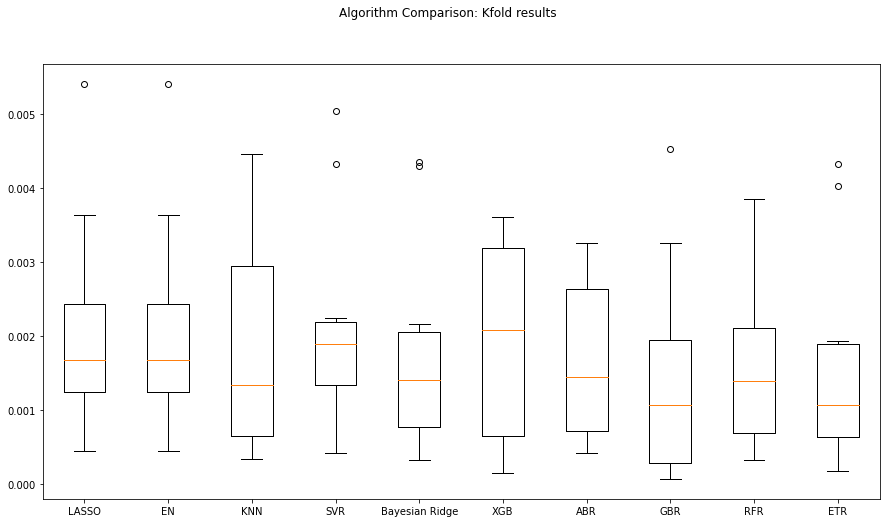

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

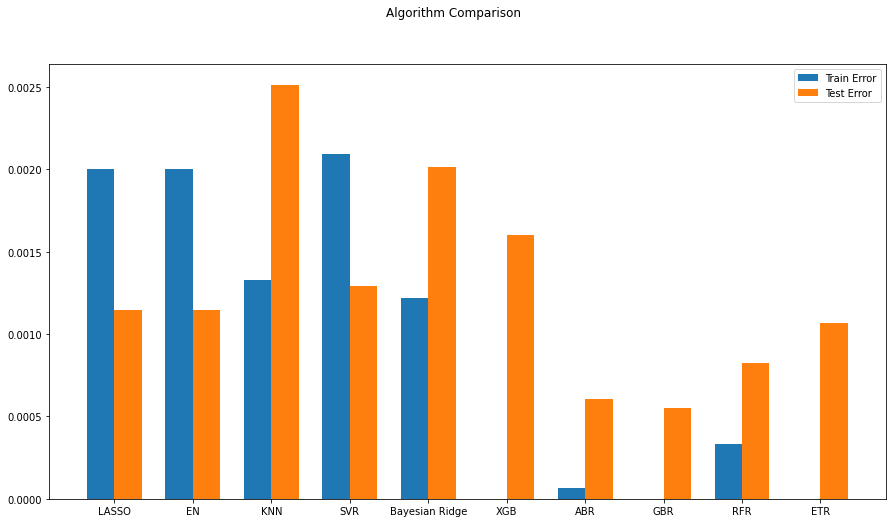

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

## LSTM Model

In [ ]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [ ]:
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),
                              epochs=330, batch_size=72, verbose=0, shuffle=False)

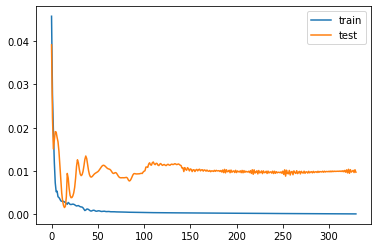

In [ ]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.title("LSTM loss")
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.legend()
pyplot.show()

In [ ]:
Y_train_predict = LSTMModel.predict(X_train_LSTM)
mse_train = mean_squared_error(Y_train_LSTM, Y_train_predict)
Y_test_predict = LSTMModel.predict(X_test_LSTM)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print("mse train : ", mse_train, "mse test: ", mse_test)


1/1 [==============================] - 0s 16ms/step
mse train :  0.0002780920500434356 mse test:  0.004818999832792153


In [ ]:
train_results.append(mse_train)
test_results.append(mse_test)
names.append("LSTM")

In [ ]:
# !pip install keras-tuner

In [ ]:
from tensorflow import keras
#from kerastuner.tuners import BayesianOptimization
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed, Activation, RepeatVector, Bidirectional, Conv1D, GRU

## GRU Model

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed, Activation, RepeatVector, Bidirectional, Conv1D, GRU

In [ ]:
# GRU
# GRU Model
def create_GRUmodel(neurons=12, learn_rate = 0.01, momentum=0):
      # create model
    model = Sequential()
    model.add(Conv1D(filters=100, input_shape=(X_train_LSTM.shape[1], 
                                               X_train_LSTM.shape[2]), 
                                               kernel_size=2, 
                                               strides=2, padding='valid'))
    model.add(GRU(100, return_sequences=True))
    model.add(GRU(100, return_sequences=True))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
GRUModel = create_GRUmodel(12, learn_rate = 0.01, momentum=0)
GRUModel_fit = GRUModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),
                            epochs=330, batch_size=72, verbose=0, shuffle=False)

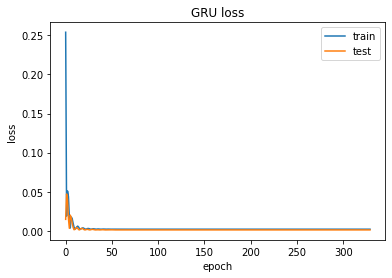

In [ ]:
#Visual plot to check if the error is reducing
pyplot.title("GRU loss")
pyplot.plot(GRUModel_fit.history['loss'], label='train')
pyplot.plot(GRUModel_fit.history['val_loss'], label='test')
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.legend()
pyplot.show()

In [ ]:
Y_train_predict2 = GRUModel.predict(X_train_LSTM)
mse_train2 = mean_squared_error(Y_train_LSTM, Y_train_predict2.squeeze())
Y_test_predict2 = GRUModel.predict(X_test_LSTM)
mse_test2 = mean_squared_error(Y_test, Y_test_predict2.squeeze())
print("mse train : ", mse_train2, "mse test: ", mse_test2)

1/1 [==============================] - 0s 17ms/step
mse train :  0.0020478509801942716 mse test:  0.001153080808079727


In [ ]:
train_results.append(mse_train2)
test_results.append(mse_test2)
names.append("GRU")

## Seq2seq Model

In [ ]:
# Seq2Seq Model
def create_Seq2Seqmodel(neurons=12, learn_rate = 0.01, momentum=0):
      # create model
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]), return_sequences=True))
    model.add(Dropout(.2, input_shape=(100, )))
    model.add(LSTM(100, activation='relu', input_shape=(50,)), return_sequences=True)
    model.add(LSTM(100, activation='relu', input_shape=(100,)), return_sequences=True)
    model.add(Dropout(.2, input_shape=(100,)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
Seq2SeqModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
Seq2SeqModel_fit = Seq2SeqModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),
                              epochs=330, batch_size=72, verbose=0, shuffle=False)

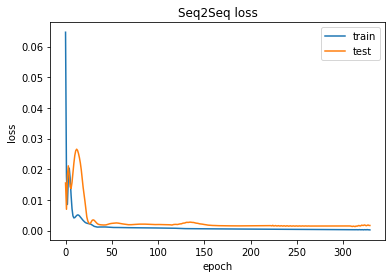

In [ ]:
#Visual plot to check if the error is reducing
pyplot.title("Seq2Seq loss")
pyplot.plot(Seq2SeqModel_fit.history['loss'], label='train')
pyplot.plot(Seq2SeqModel_fit.history['val_loss'], label='test')
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.legend()
pyplot.show()

In [ ]:
Y_train_predict3 = Seq2SeqModel.predict(X_train_LSTM)
mse_train3 = mean_squared_error(Y_train_LSTM, Y_train_predict3)
Y_test_predict3 = Seq2SeqModel.predict(X_test_LSTM)
mse_test3 = mean_squared_error(Y_test, Y_test_predict3)
print("mse train : ", mse_train3, "mse test: ", mse_test3)

1/1 [==============================] - 0s 16ms/step
mse train :  0.00026270593038626663 mse test:  0.0016543261152307449


In [ ]:
train_results.append(mse_train3)
test_results.append(mse_test3)
names.append("Seq2Seq")

In [ ]:
# #b =  np.array(Y_test_predictB)
# pyplot.plot(Y_test.values, 'r', label='actual')
# pyplot.plot(Y_test_predictB, 'b--', label='predicted')
# pyplot.legend()

## Others

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [ ]:
scaler = StandardScaler()
tscv = TimeSeriesSplit(n_splits=5)

[21:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


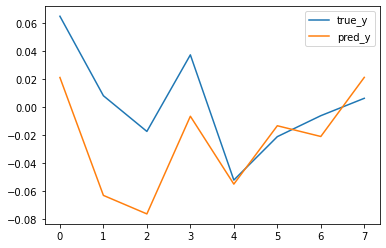

In [ ]:
xgbR = xgb.XGBRegressor()
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

xgbR.fit(x_train_s, Y_train)
true_y = Y_test.values.ravel()
pred_y = xgbR.predict(x_test_s)

from matplotlib import pyplot
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.svm import SVR

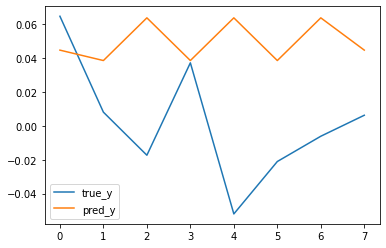

In [ ]:
svr = DecisionTreeRegressor()
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

svr.fit(X_train, Y_train)
true_y = Y_test.values.ravel()
pred_y = svr.predict(x_test_s)

from matplotlib import pyplot
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

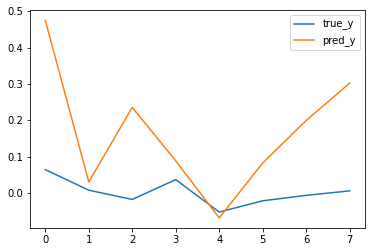

In [ ]:
svr = MLPRegressor()
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

svr.fit(X_train, Y_train)
true_y = Y_test.values.ravel()
pred_y = svr.predict(x_test_s)

from matplotlib import pyplot
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

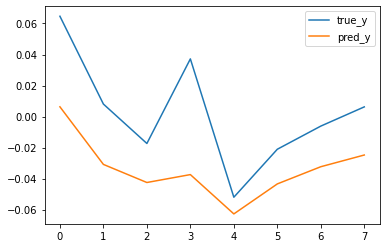

In [ ]:
bayR = linear_model.BayesianRidge()
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

bayR.fit(x_train_s, Y_train)
true_y = Y_test.values.ravel()
pred_y = bayR.predict(x_test_s)

from matplotlib import pyplot
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

In [ ]:
# https://github.com/GeorgeBatch/moleculenet/blob/a72cf362e0002261e8e1de1bfbcb65efac315437/results_backup/esol_original_random_search_best_params_0.json
# APS1052/s8/S8.Miscellaneous/RandomForestApplications_new/Piotroski_classifier/threeFundamentalFactors-MixedCap2009 - Piotroski/ThreeFundamFactors_mod_mixedcap_piotroski_randomforest_classifier.py
# https://xgboost.readthedocs.io/en/stable/parameter.html
pipe = Pipeline([("scaler", StandardScaler()), ("PCA", PCA()), ('xgb', xgb.XGBRegressor(verbosity=0))])

# parameter grid 
para_grid = {'xgb__n_estimators': [5, 10, 50],
            'xgb__max_depth': [1, 3, 6, 12],
            'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
            'xgb__booster': ['gbtree', 'gblinear', 'dart'],
            'xgb__gamma': [0, 0.2, 0.5],
            'xgb__base_score': [0.2, 0.5, 1],
            'xgb__subsample': [0.2, 0.5, 1],
            'xgb__tree_method': ['auto', 'exact', 'approx', 'hist'],
            'xgb__min_child_weight': [1, 5, 10],
            'xgb__max_delta_step': [1, 5, 10, 25, 50, 100],
            "xgb__colsample_bytree": [0.6,0.9,1],
            "xgb__colsample_bylevel": [0.6,0.7,0.9],
            'PCA__n_components': [1,2,3,4,5]
            }

print('Parameter grid: {}' .format(para_grid))
rso = RandomizedSearchCV(pipe,para_grid, n_jobs=-1,verbose=3)

# Fit the model to find the best hyperparameter values
rso.fit(X_train, Y_train.values.ravel())

print('Best parameters:', rso.best_params_)
print("rso best score: ", rso.best_score_) 


Parameter grid: {'xgb__n_estimators': [5, 10, 50], 'xgb__max_depth': [1, 3, 6, 12], 'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5], 'xgb__booster': ['gbtree', 'gblinear', 'dart'], 'xgb__gamma': [0, 0.2, 0.5], 'xgb__base_score': [0.2, 0.5, 1], 'xgb__subsample': [0.2, 0.5, 1], 'xgb__tree_method': ['auto', 'exact', 'approx', 'hist'], 'xgb__min_child_weight': [1, 5, 10], 'xgb__max_delta_step': [1, 5, 10, 25, 50, 100], 'xgb__colsample_bytree': [0.6, 0.9, 1], 'xgb__colsample_bylevel': [0.6, 0.7, 0.9], 'PCA__n_components': [1, 2, 3, 4, 5]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'xgb__tree_method': 'auto', 'xgb__subsample': 0.5, 'xgb__n_estimators': 50, 'xgb__min_child_weight': 1, 'xgb__max_depth': 6, 'xgb__max_delta_step': 1, 'xgb__learning_rate': 0.5, 'xgb__gamma': 0.2, 'xgb__colsample_bytree': 0.6, 'xgb__colsample_bylevel': 0.7, 'xgb__booster': 'gblinear', 'xgb__base_score': 0.5, 'PCA__n_components': 3}
rso best score:  0.09462549638036084


[23:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


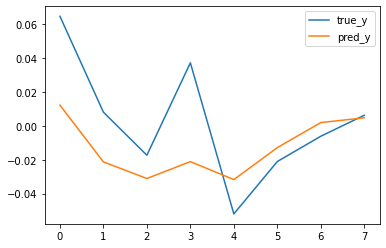

In [ ]:
best_xgb = xgb.XGBRegressor(tree_method='auto', subsample=0.5, n_estimators=50, 
                            min_child_weight=1, max_depth=6, max_delta_step=1,
                            learning_rate=0.5, gamma=0.2, colsample_bytree = 0.6,
                            booster='gblinear', colsample_bylevel=0.7, base_score=0.5)


scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

pca = PCA(n_components =3)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)

treeModel = best_xgb.fit(Xtrain, Y_train)

true_y = Y_test.values.ravel()
pred_y = best_xgb.predict(Xtest)
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()


In [ ]:
Y_train_predict4 = best_xgb.predict(Xtrain)
mse_train4 = mean_squared_error(Y_train, Y_train_predict4)
Y_test_predict4 = best_xgb.predict(Xtest)
mse_test4 = mean_squared_error(Y_test, Y_test_predict4)
print("mse train : ", mse_train4, "mse test: ", mse_test4)

#models.append(('XGB-P', best_xgb))
train_results.append(mse_train4)
test_results.append(mse_test4)
names.append('XGB-P')

mse train :  0.0014708080106751794 mse test:  0.0009691494350487505


In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), ('dtreeReg',DecisionTreeRegressor())])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ["friedman_mse", "mse"]
max_depth = [1,4,6,8,10,15,30]

param_grid = [{'pca__n_components': list(range(1,X.shape[1]+1,1)),
               'dtreeReg__criterion': ["friedman_mse", "mse"],
               'dtreeReg__max_depth': [4,6,8,10]}]

rso_t = RandomizedSearchCV(pipe, param_grid)

rso_t.fit(X_train, Y_train.values.ravel())
print("best params: ", rso_t.best_params_)


best params:  {'pca__n_components': 11, 'dtreeReg__max_depth': 4, 'dtreeReg__criterion': 'friedman_mse'}


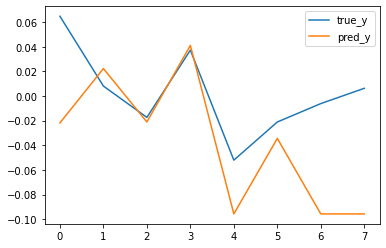

In [ ]:
best_dtr = DecisionTreeRegressor(max_depth=4, criterion="friedman_mse")#Lasso(alpha=best_parameters['lasso__alpha'])
best_dtr.random_state = 42
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

pca = PCA(n_components = 11)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)


treeModel = best_dtr.fit(Xtrain, Y_train)

true_y = Y_test.values.ravel()
pred_y = treeModel.predict(Xtest)
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

In [ ]:
Y_train_predict5 = treeModel.predict(Xtrain)
mse_train5 = mean_squared_error(Y_train, Y_train_predict5)
Y_test_predict5 = treeModel.predict(Xtest)
mse_test5 = mean_squared_error(Y_test, Y_test_predict5)
print("mse train : ", mse_train5, "mse test: ", mse_test5)

#models.append(('XGB-P', best_xgb))
train_results.append(mse_train5)
test_results.append(mse_test5)
names.append('DTR-P')

mse train :  0.00017784369163054172 mse test:  0.003523298048324588


In [ ]:
#MLPRegressor
pipe = Pipeline([("scaler", StandardScaler()),("pca", PCA()), ("mlpregressor", MLPRegressor())])
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(16, 16,), (64, 64,), (128, 128,)], 
    'mlpregressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpregressor__solver': ['adam', 'sgd',"friedman_mse", "mse"],
    'pca__n_components': list(range(1,X.shape[1]+1,1))
}

rso_m = RandomizedSearchCV(pipe, param_grid)

rso_m.fit(X_train, Y_train.values.ravel())
print("best params: ", rso_m.best_params_)

best params:  {'pca__n_components': 12, 'mlpregressor__solver': 'sgd', 'mlpregressor__hidden_layer_sizes': (64, 64), 'mlpregressor__activation': 'logistic'}


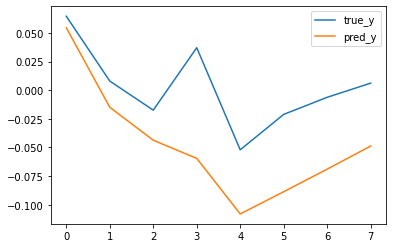

In [ ]:
best_ml = MLPRegressor(hidden_layer_sizes= (16, 16), solver="adam", activation="identity")#Lasso(alpha=best_parameters['lasso__alpha'])
#best_ml.random_state = 42
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

pca = PCA(n_components = 10)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)


treeModel = best_ml.fit(Xtrain, Y_train)

true_y = Y_test.values.ravel()
pred_y = treeModel.predict(Xtest)
pyplot.plot(true_y, label='true_y')
pyplot.plot(pred_y, label='pred_y')
pyplot.legend()
pyplot.show()

In [ ]:
Y_train_predict8 = treeModel.predict(Xtrain)
mse_train8 = mean_squared_error(Y_train, Y_train_predict8)
Y_test_predict8 = treeModel.predict(Xtest)
mse_test8 = mean_squared_error(Y_test, Y_test_predict8)
print("mse train : ", mse_train8, "mse test: ", mse_test8)

#models.append(('XGB-P', best_xgb))
train_results.append(mse_train8)
test_results.append(mse_test8)
names.append('ML-P')

mse train :  0.0012931249332477019 mse test:  0.0031674793100852083


In [ ]:
# linear_model.BayesianRidge()
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", linear_model.BayesianRidge())])
#pipe.get_params().keys()
param_grid = [{'ridge__n_iter':[1, 10, 50, 100, 200, 300]}]
tscv = TimeSeriesSplit(n_splits=5)
grid_search_object = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_mean_absolute_error")
                  
grid_search_object.fit(X_train,Y_train)
best_parameters=grid_search_object.best_params_
print("best alpha: ", best_parameters)

#instantiate and fit the best lasso (using the best parameters)
best_ridge = linear_model.BayesianRidge(n_iter=best_parameters['ridge__n_iter'])

#do not forget to scale the data
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
best_ridge.fit(X_train_s, Y_train)

best alpha:  {'ridge__n_iter': 10}


BayesianRidge(n_iter=10)

In [ ]:
Y_train_predict6 = best_ridge.predict(X_train_s)
mse_train6 = mean_squared_error(Y_train, Y_train_predict6)
Y_test_predict6 = best_ridge.predict(X_test_s)
mse_test6 = mean_squared_error(Y_test, Y_test_predict6)
print("mse train : ", mse_train6, "mse test: ", mse_test6)

train_results.append(mse_train6)
test_results.append(mse_test6)
names.append('BayesianRidge-P')

mse train :  0.0011773358659530235 mse test:  0.0017283067684529323


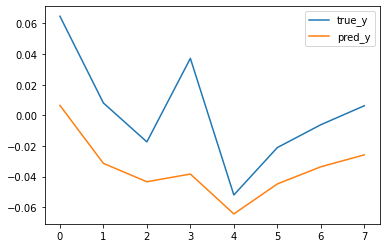

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

predictions_train = best_ridge.predict(X_train_s)
predictions_test = best_ridge.predict(X_test_s)
from matplotlib import pyplot

pyplot.plot(true_y, label='true_y')
pyplot.plot(predictions_test, label='pred_y')
pyplot.legend()
pyplot.show()

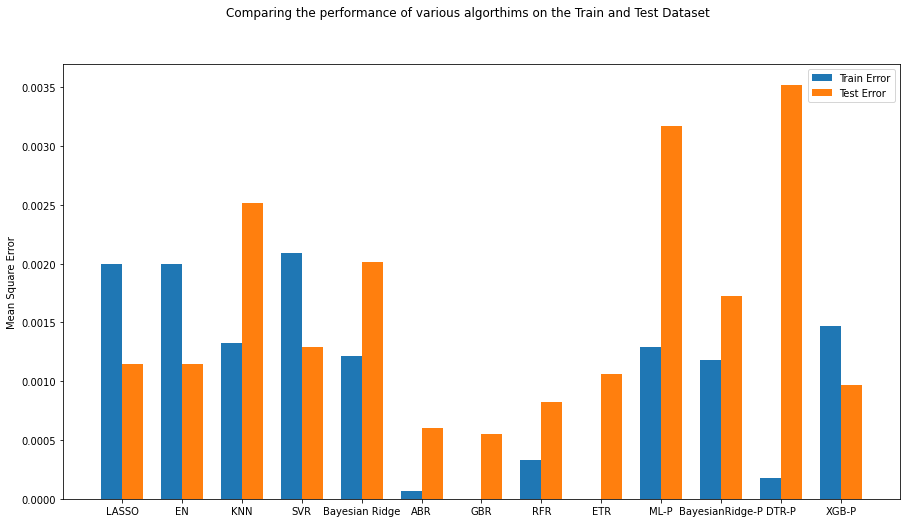

In [ ]:
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

#Evaluation


In [ ]:
# # compare algorithms
# fig = pyplot.figure()

# ind = np.arange(len(names))  # the x locations for the groups
# width = 0.35  # the width of the bars

# fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
# ax = fig.add_subplot(111)
# pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
# pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
# fig.set_size_inches(15,8)
# pyplot.legend()
# ax.set_xticks(ind)
# ax.set_xticklabels(names)
# pyplot.ylabel('Mean Square Error')
# pyplot.show()

In [ ]:
############################################
#Evaluate Metrics
############################################

In [ ]:
def detrendPrice(series):
    # fit linear model
    length = len(series)
    x = np.arange(length)
    y = np.array(series)
    x_const = sm.add_constant(x) #need to add intercept constant
    model = sm.OLS(y,x_const)
    result = model.fit()
    #y = pd.Series(y)
    #intercept = result.params[0]
    #beta = result.params[1]
    #print(result.summary())
    df = pd.DataFrame(result.params*x_const)
    y_hat = df[0] + df[1]
    #the residuals are the detrended prices
    resid = y-y_hat
    #add minimum necessary to residuals to avoid negative detrended prices
    resid = resid + abs(resid.min() + 1/10*resid.min())
    return resid 

In [ ]:
def bootstrap(ser, name):
    ser.dropna(inplace=True)
    arr = np.array(ser)
    alpha = .05*100 #significance alpha
    reps = 5000 #how many bootstrapings, 50000 limit if you have 8GB RAM

    percentile = 100-alpha
    ave = np.average(arr) #arithmetic mean

    print("average return %f" %ave)

    #ave = ms.gmean(arr) #geometric mean

    centered_arr = arr-ave
    n = len(centered_arr)
    #constructs 50000 alternative return histories and calculates their theoretical averages
    xb = np.random.choice(centered_arr, (n, reps), replace=True)
    mb = xb.mean(axis=0) #arithmetic mean
    #mb = ms.gmean(mb, axis=0) #geometric mean

    #sorts the 50000 averages
    mb.sort()
    #calculates the 95% conficence interval (two tails) threshold for the theoretical averages
    print(np.percentile(mb, [2.5, 97.5])) 
    threshold = np.percentile(mb, [percentile])[0]


    if ave > threshold:
        print("Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)")
    else:
        print("Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)")

    #count will be the items i that are smaller than ave
    count_vals = 0
    for i in mb:
        count_vals += 1
        if i > ave:
            break
        
    #p is based on the count that are larger than ave so 1-count is needed:
    p = 1-count_vals/len(mb)

    print("p_value:")
    print(p)

    #histogram
    pyplot.figure()
    pyplot.title(name)
    sr = pd.Series(mb)
    desc = sr.describe()
    count = desc[0]
    std = desc[2]
    minim = desc[3]
    maxim = desc[7]
    R = maxim-minim
    n = count
    s = std
    bins = int(round(R*(n**(1/3))/(3.49*std),0))
    fig = sr.hist(bins=bins)
    pyplot.show()

    return p

In [ ]:
def WhiteRealityCheck(X_test, Y_test, models, models_name):
  p_values = []
  for model, name in zip(models, models_name):
    positions = np.where(model.predict(X_test)> 0,1,-1 ) #POSITIONS
    detrended_open = detrendPrice(Y_test)
    detrended_retFut1 = detrended_open.pct_change(periods=1).shift(-1).fillna(0)
    detrended_syst_rets = detrended_retFut1 * pd.Series(positions.squeeze()).fillna(0)
    p_value = bootstrap(detrended_syst_rets, name)
    p_values.append(p_value)
  
  return p_values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
#seaborn.mpl.rcParams['savefig.dpi'] = 90
'''
https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html
This subroutine will calculate White's Reality Check for a single trading rule
in accordance with Aronson's Evidence Based Technical Analysis p.237ff
'''


#returns must be detrended by subtracting the average daily return of the benchmark
def bootstrap(ser):
    ser.dropna(inplace=True)
    arr = np.array(ser.values)
    alpha = .05*100 #significance alpha
    reps = 5000 #how many bootstrapings, 50000 limit if you have 8GB RAM

    percentile = 100-alpha
    ave = np.average(arr) #arithmetic mean

    print("average return %f" %ave)

    #ave = ms.gmean(arr) #geometric mean

    centered_arr = arr-ave
    n = len(centered_arr)
    #constructs 50000 alternative return histories and calculates their theoretical averages
    xb = np.random.choice(centered_arr, (n, reps), replace=True)
    mb = xb.mean(axis=0) #arithmetic mean
    #mb = ms.gmean(mb, axis=0) #geometric mean

    #sorts the 50000 averages
    mb.sort()
    #calculates the 95% conficence interval (two tails) threshold for the theoretical averages
    print(np.percentile(mb, [2.5, 97.5])) 
    threshold = np.percentile(mb, [percentile])[0]


    if ave > threshold:
        print("Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)")
    else:
        print("Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)")

    #count will be the items i that are smaller than ave
    count_vals = 0
    for i in mb:
        count_vals += 1
        if i > ave:
            break
        
    #p is based on the count that are larger than ave so 1-count is needed:
    p = 1-count_vals/len(mb)

    print("p_value:")
    print(p)


    
    #histogram
    sr = pd.Series(mb)
    desc = sr.describe()
    count = desc[0]
    std = desc[2]
    minim = desc[3]
    maxim = desc[7]
    R = maxim-minim
    n = count
    s = std
    bins = int(round(R*(n**(1/3))/(3.49*std),0))
    fig = sr.hist(bins=bins)

In [ ]:
CopyX = dataset[["AMZN_pred"]].copy()
CopyX

,AMZN_pred
2020-08-26,0.025699
2020-09-02,-0.106366
2020-09-10,-0.053824
2020-09-17,0.003669
2020-09-24,0.064585
2020-10-01,-0.009579
2020-10-08,0.045373
2020-10-16,-0.021094
2020-10-23,-0.053935
2020-10-30,0.086772


In [ ]:
AMAZON.iloc[CopyX.index.values]['Adj Close']

In [ ]:
#'XGBRegressor'
pca = PCA(n_components =3)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)
# p_name_1 = ['XGBRegressor']
# p_values_1 = WhiteRealityCheck(Xtest, Y_test, [best_xgb], p_name_1)
positions2 = np.where(best_xgb.predict(Xtest)> 0,1,-1 )
CopyX = dataset[["AMZN_pred"]].copy()
new_close=AMAZON.iloc[CopyX.index.values]['Adj Close'].reset_index(drop= True)[(Xtrain.shape[0]):,]
detrended_close = detrendPrice.detrendPrice(new_close)
detrended_ret1 = detrended_close.pct_change(periods=1).fillna(0)
detrended_syst_rets = detrended_ret1 * pd.Series(positions2).shift(1).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
pyplot.show()

IndexError: ignored

average return -1.428378
[-1.8575712   1.27807318]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.9372


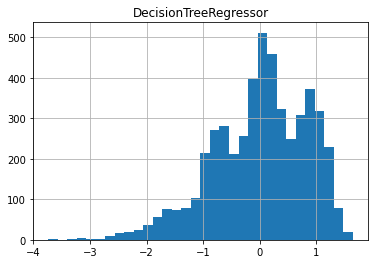

In [ ]:
#, 'DecisionTreeRegressor'
pca = PCA(n_components =11)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)
p_name_1 = ['DecisionTreeRegressor']
p_values_1 = WhiteRealityCheck(Xtest, Y_test, [best_dtr], p_name_1)

average return -1.220854
[-1.98786124  1.36488365]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.9057999999999999


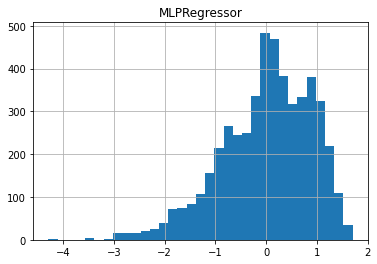

In [ ]:
#, 'MLPRegressor']
pca = PCA(n_components =10)
pca.fit(x_train_s)
Xtrain = pca.transform(x_train_s)
Xtest = pca.transform(x_test_s)
p_name_1 = ['MLPRegressor']
p_values_1 = WhiteRealityCheck(Xtest, Y_test, [best_ml], p_name_1)

average return -1.220854
[-1.95888749  1.3318799 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.9026


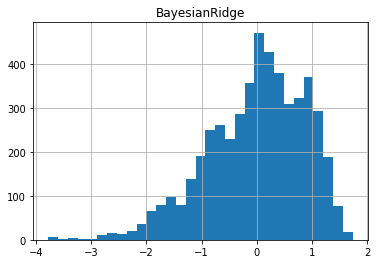

In [ ]:
#Bay

p_name_1 = ['BayesianRidge']
p_values_1 = WhiteRealityCheck(X_test_s, Y_test, [best_ridge], p_name_1)

1/1 [==============================] - 0s 17ms/step
average return -1.324973
[-1.93252628  1.31072602]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.9176


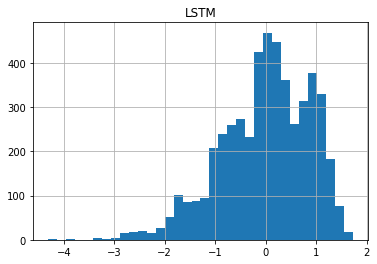

1/1 [==============================] - 0s 20ms/step
average return -1.014371
[-1.97163687  1.39061807]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.8632


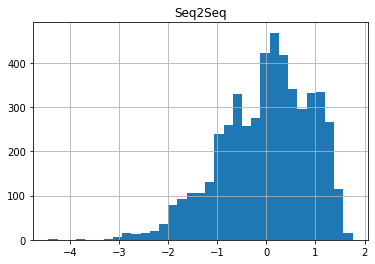

1/1 [==============================] - 0s 19ms/step
average return -1.192969
[-1.94652183  1.36726964]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.9056


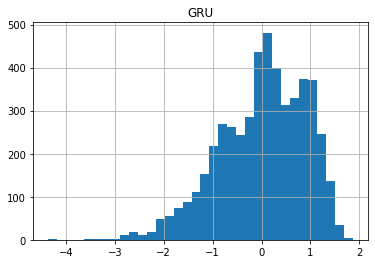

In [ ]:
p_names = ['LSTM', 'Seq2Seq', 'GRU']
p_values = WhiteRealityCheck(X_test_LSTM, Y_test_LSTM, [LSTMModel, Seq2SeqModel, GRUModel], p_names)

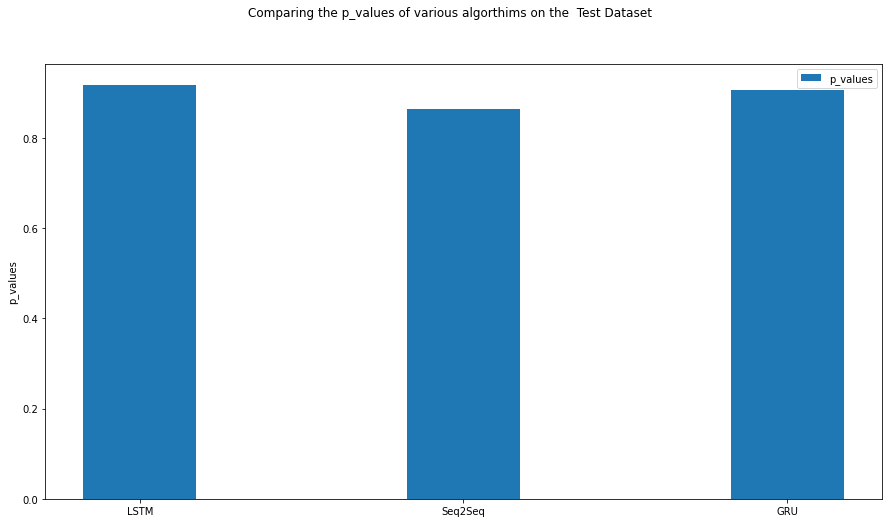

In [ ]:
fig = pyplot.figure()

ind = np.arange(len(p_names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the p_values of various algorthims on the  Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind, p_values, width=width, label='p_values')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(p_names)
pyplot.ylabel('p_values')
pyplot.show()